In [3]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt

## get historical data 

In [ ]:
# no libraby worked so we got the data manully from : yahoo finance
# https://finance.yahoo.com

## Process the data

In [7]:
histo_data = pd.read_csv('AMZN.csv')
histo_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
1,2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2,2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
3,2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
4,2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...,...
1274,2020-01-27,91.000000,92.050003,90.766998,91.417000,91.417000,70570000
1275,2020-01-28,92.025002,92.905502,91.500999,92.662498,92.662498,56160000
1276,2020-01-29,93.199997,93.737503,92.750999,92.900002,92.900002,41760000
1277,2020-01-30,92.900002,93.643501,92.530502,93.533997,93.533997,126548000


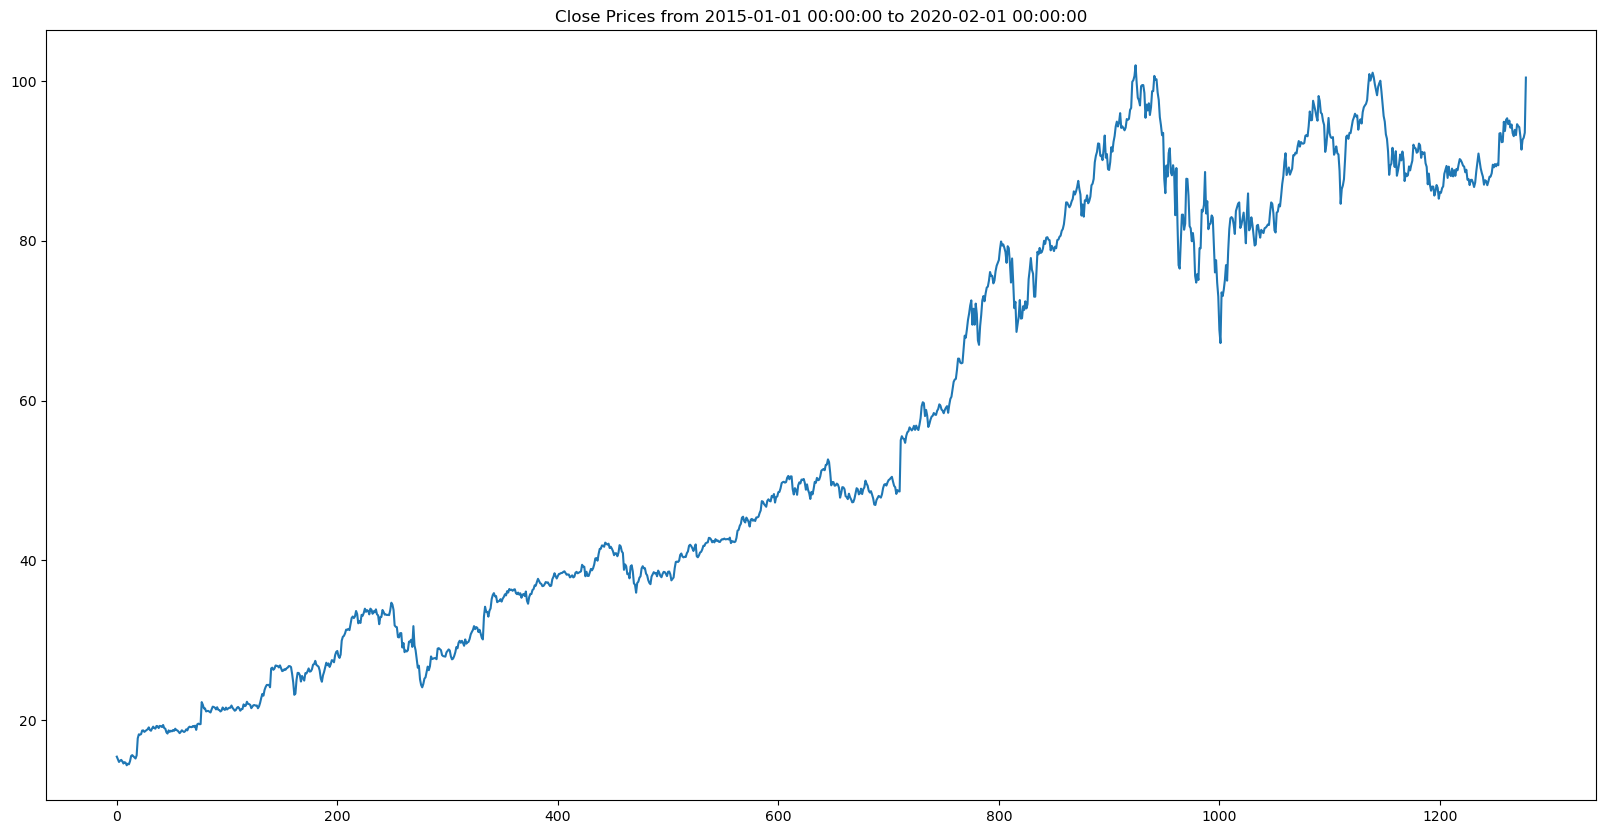

In [8]:
# display
# initialize parameters
start_date = datetime(2015, 1, 1)
end_date = datetime(2020, 2, 1)

plt.figure(figsize = (20,10))
plt.title('Close Prices from {} to {}'.format(start_date,end_date))
plt.plot(histo_data['Close'])
plt.show()

## calculate the change

In [9]:
len(histo_data)

1279

In [10]:
Changes = []
Changes.append(0)
for i in range(1,len(histo_data)):
    
    p_old = histo_data['Close'][i-1]
    p_new = histo_data['Close'][i]
    
    change = ((p_new-p_old)/p_old)*100
    Changes.append(change)

In [11]:
histo_data['change'] = Changes

## Classify the change

In [12]:
newClass= []
for i in histo_data.index:
    #print(data.change[i])
    if((abs(histo_data.change[i]) < 0.01 )):
        print('no change --> 0')
        print('1% -->', histo_data.change[i])
        newClass.append(0)
        
    elif( histo_data.change[i] >= 0.01 ):
        print('ascending --> 1')
        print('1% -->', histo_data.change[i])
        newClass.append(1)
    elif( histo_data.change[i] <= -0.01 ):
        print('descending --> -1')
        print('1% -->', histo_data.change[i])
        newClass.append(-1)
    print('_______________________________')

no change --> 0
1% --> 0.0
_______________________________
descending --> -1
1% --> -2.0517308440295574
_______________________________
descending --> -1
1% --> -2.2833316787451645
_______________________________
ascending --> 1
1% --> 1.0599749398895961
_______________________________
ascending --> 1
1% --> 0.6836002948864038
_______________________________
descending --> -1
1% --> -1.1748652066830794
_______________________________
descending --> -1
1% --> -1.859024012393504
_______________________________
ascending --> 1
1% --> 1.1427198792079956
_______________________________
descending --> -1
1% --> -0.4987446563072487
_______________________________
descending --> -1
1% --> -2.155010740955438
_______________________________
ascending --> 1
1% --> 1.3207875936574363
_______________________________
descending --> -1
1% --> -0.4471348971589824
_______________________________
ascending --> 1
1% --> 2.6983139856274265
_______________________________
ascending --> 1
1% --> 4.396972245

In [13]:
histo_data['Class_target'] = newClass

In [14]:
histo_data

,Date,Open,High,Low,Close,Adj Close,Volume,change,Class_target
0,2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,0.000000,0
1,2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000,-2.051731,-1
2,2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000,-2.283332,-1
3,2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000,1.059975,1
4,2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000,0.683600,1
...,...,...,...,...,...,...,...,...,...
1274,2020-01-27,91.000000,92.050003,90.766998,91.417000,91.417000,70570000,-1.788746,-1
1275,2020-01-28,92.025002,92.905502,91.500999,92.662498,92.662498,56160000,1.362436,1
1276,2020-01-29,93.199997,93.737503,92.750999,92.900002,92.900002,41760000,0.256311,1
1277,2020-01-30,92.900002,93.643501,92.530502,93.533997,93.533997,126548000,0.682449,1


In [15]:
histo_data.to_csv('AMZN.csv',index=False)

## add the close price, close and change to the social media aggregated data

In [16]:
agreg_data = pd.read_csv('3.amazon_twitter_data_aggregated.csv')
agreg_data

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,tweet_count,total_count_tweet
0,2015-01-01,7.102568e+19,183193554413,45,699,190,59.508095,-37.266429,55,59,15,129,828
1,2015-01-02,9.312153e+19,240015013196,10,371,88,44.106540,3.825316,35,89,45,169,540
2,2015-01-03,3.859312e+19,99419765892,3,11,52,12.579978,3.455700,10,45,15,70,81
3,2015-01-04,4.579198e+19,117890962207,3,24,43,16.978333,4.842500,8,58,17,83,107
4,2015-01-05,1.540317e+20,396308980682,14,53,130,56.148954,22.619850,22,186,71,279,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,2.349124e+20,306041457501,144,503,1393,65.543312,21.729725,27,82,85,194,697
1823,2019-12-29,1.841121e+20,239798650116,62,293,580,50.266318,18.140458,13,56,83,152,445
1824,2019-12-30,6.252208e+20,814103099561,142,255,1334,168.356250,57.430292,62,211,243,516,771
1825,2019-12-31,5.829812e+20,758923174515,160,234,1037,159.315592,51.076145,79,181,221,481,715


In [17]:
### merge price of the day to the data
histo_data.rename(columns = {'Date':'date'}, inplace = True)
merged = pd.merge(agreg_data, histo_data, how="left", on="date")
merged

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,...,tweet_count,total_count_tweet,Open,High,Low,Close,Adj Close,Volume,change,Class_target
0,2015-01-01,7.102568e+19,183193554413,45,699,190,59.508095,-37.266429,55,59,...,129,828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,9.312153e+19,240015013196,10,371,88,44.106540,3.825316,35,89,...,169,540,15.629000,15.737500,15.348000,15.426000,15.426000,55664000.0,0.000000,0.0
2,2015-01-03,3.859312e+19,99419765892,3,11,52,12.579978,3.455700,10,45,...,70,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,4.579198e+19,117890962207,3,24,43,16.978333,4.842500,8,58,...,83,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,1.540317e+20,396308980682,14,53,130,56.148954,22.619850,22,186,...,279,332,15.350500,15.419000,15.042500,15.109500,15.109500,55484000.0,-2.051731,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,2.349124e+20,306041457501,144,503,1393,65.543312,21.729725,27,82,...,194,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,2019-12-29,1.841121e+20,239798650116,62,293,580,50.266318,18.140458,13,56,...,152,445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,2019-12-30,6.252208e+20,814103099561,142,255,1334,168.356250,57.430292,62,211,...,516,771,93.699997,94.199997,92.030998,92.344498,92.344498,73494000.0,-1.225265,-1.0
1825,2019-12-31,5.829812e+20,758923174515,160,234,1037,159.315592,51.076145,79,181,...,481,715,92.099998,92.663002,91.611504,92.391998,92.391998,50130000.0,0.051438,1.0


In [18]:
merged = merged.drop(columns=['High', 'Low', 'Adj Close', 'Volume'])
merged

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,tweet_count,total_count_tweet,Open,Close,change,Class_target
0,2015-01-01,7.102568e+19,183193554413,45,699,190,59.508095,-37.266429,55,59,15,129,828,NaN,NaN,NaN,NaN
1,2015-01-02,9.312153e+19,240015013196,10,371,88,44.106540,3.825316,35,89,45,169,540,15.629000,15.426000,0.000000,0.0
2,2015-01-03,3.859312e+19,99419765892,3,11,52,12.579978,3.455700,10,45,15,70,81,NaN,NaN,NaN,NaN
3,2015-01-04,4.579198e+19,117890962207,3,24,43,16.978333,4.842500,8,58,17,83,107,NaN,NaN,NaN,NaN
4,2015-01-05,1.540317e+20,396308980682,14,53,130,56.148954,22.619850,22,186,71,279,332,15.350500,15.109500,-2.051731,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,2.349124e+20,306041457501,144,503,1393,65.543312,21.729725,27,82,85,194,697,NaN,NaN,NaN,NaN
1823,2019-12-29,1.841121e+20,239798650116,62,293,580,50.266318,18.140458,13,56,83,152,445,NaN,NaN,NaN,NaN
1824,2019-12-30,6.252208e+20,814103099561,142,255,1334,168.356250,57.430292,62,211,243,516,771,93.699997,92.344498,-1.225265,-1.0
1825,2019-12-31,5.829812e+20,758923174515,160,234,1037,159.315592,51.076145,79,181,221,481,715,92.099998,92.391998,0.051438,1.0


## Fill forward the closed market days values

In [19]:
merged_filna = merged.copy()

In [20]:
merged_filna.Close = merged_filna.Close.fillna(method='ffill')

In [21]:
merged_filna

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,tweet_count,total_count_tweet,Open,Close,change,Class_target
0,2015-01-01,7.102568e+19,183193554413,45,699,190,59.508095,-37.266429,55,59,15,129,828,NaN,NaN,NaN,NaN
1,2015-01-02,9.312153e+19,240015013196,10,371,88,44.106540,3.825316,35,89,45,169,540,15.629000,15.426000,0.000000,0.0
2,2015-01-03,3.859312e+19,99419765892,3,11,52,12.579978,3.455700,10,45,15,70,81,NaN,15.426000,NaN,NaN
3,2015-01-04,4.579198e+19,117890962207,3,24,43,16.978333,4.842500,8,58,17,83,107,NaN,15.426000,NaN,NaN
4,2015-01-05,1.540317e+20,396308980682,14,53,130,56.148954,22.619850,22,186,71,279,332,15.350500,15.109500,-2.051731,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,2.349124e+20,306041457501,144,503,1393,65.543312,21.729725,27,82,85,194,697,NaN,93.489998,NaN,NaN
1823,2019-12-29,1.841121e+20,239798650116,62,293,580,50.266318,18.140458,13,56,83,152,445,NaN,93.489998,NaN,NaN
1824,2019-12-30,6.252208e+20,814103099561,142,255,1334,168.356250,57.430292,62,211,243,516,771,93.699997,92.344498,-1.225265,-1.0
1825,2019-12-31,5.829812e+20,758923174515,160,234,1037,159.315592,51.076145,79,181,221,481,715,92.099998,92.391998,0.051438,1.0


In [22]:
merged_filna.Open = merged_filna.Open.fillna(method='ffill')
merged_filna.change = merged_filna.change.fillna(method='ffill')
merged_filna.Class_target = merged_filna.Class_target.fillna(method='ffill')

In [23]:
merged_filna

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,tweet_count,total_count_tweet,Open,Close,change,Class_target
0,2015-01-01,7.102568e+19,183193554413,45,699,190,59.508095,-37.266429,55,59,15,129,828,NaN,NaN,NaN,NaN
1,2015-01-02,9.312153e+19,240015013196,10,371,88,44.106540,3.825316,35,89,45,169,540,15.629000,15.426000,0.000000,0.0
2,2015-01-03,3.859312e+19,99419765892,3,11,52,12.579978,3.455700,10,45,15,70,81,15.629000,15.426000,0.000000,0.0
3,2015-01-04,4.579198e+19,117890962207,3,24,43,16.978333,4.842500,8,58,17,83,107,15.629000,15.426000,0.000000,0.0
4,2015-01-05,1.540317e+20,396308980682,14,53,130,56.148954,22.619850,22,186,71,279,332,15.350500,15.109500,-2.051731,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,2.349124e+20,306041457501,144,503,1393,65.543312,21.729725,27,82,85,194,697,94.146004,93.489998,0.055115,1.0
1823,2019-12-29,1.841121e+20,239798650116,62,293,580,50.266318,18.140458,13,56,83,152,445,94.146004,93.489998,0.055115,1.0
1824,2019-12-30,6.252208e+20,814103099561,142,255,1334,168.356250,57.430292,62,211,243,516,771,93.699997,92.344498,-1.225265,-1.0
1825,2019-12-31,5.829812e+20,758923174515,160,234,1037,159.315592,51.076145,79,181,221,481,715,92.099998,92.391998,0.051438,1.0


In [24]:
merged_filna = merged_filna.drop(columns=['tweet_id','post_date','retweet_num','tweet_count'])
merged_filna = merged_filna.drop([0])
merged_filna

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target
1,2015-01-02,10,88,44.106540,3.825316,35,89,45,540,15.629000,15.426000,0.000000,0.0
2,2015-01-03,3,52,12.579978,3.455700,10,45,15,81,15.629000,15.426000,0.000000,0.0
3,2015-01-04,3,43,16.978333,4.842500,8,58,17,107,15.629000,15.426000,0.000000,0.0
4,2015-01-05,14,130,56.148954,22.619850,22,186,71,332,15.350500,15.109500,-2.051731,-1.0
5,2015-01-06,11,139,53.996380,16.087120,25,119,63,273,15.112000,14.764500,-2.283332,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,144,1393,65.543312,21.729725,27,82,85,697,94.146004,93.489998,0.055115,1.0
1823,2019-12-29,62,580,50.266318,18.140458,13,56,83,445,94.146004,93.489998,0.055115,1.0
1824,2019-12-30,142,1334,168.356250,57.430292,62,211,243,771,93.699997,92.344498,-1.225265,-1.0
1825,2019-12-31,160,1037,159.315592,51.076145,79,181,221,715,92.099998,92.391998,0.051438,1.0


In [25]:
merged_filna.to_csv('4.amazon_twitter_data_aggregated_prices.csv',index=False)